<a href="https://colab.research.google.com/github/Ashahet1/Google-Colab/blob/main/HousingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1
You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

Load the dataset ../data/housing-data.csv
plot the histograms for each feature
create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
create a linear regression model in Keras with the appropriate number of inputs and output
split the data into train and test with a 20% test size
train the model on the training set and check its accuracy on training and test set
how's your model doing? Is the loss growing smaller?
try to improve your model with these experiments:
normalize the input features with one of the rescaling techniques mentioned above
use a different value for the learning rate of your model
use a different optimizer
once you're satisfied with training, check the R2score on the test set

In [4]:
# Step 1: Load the dataset
from pandas import read_csv
import pandas as pd
df = pd.read_csv('housing-data.csv')

In [5]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [6]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

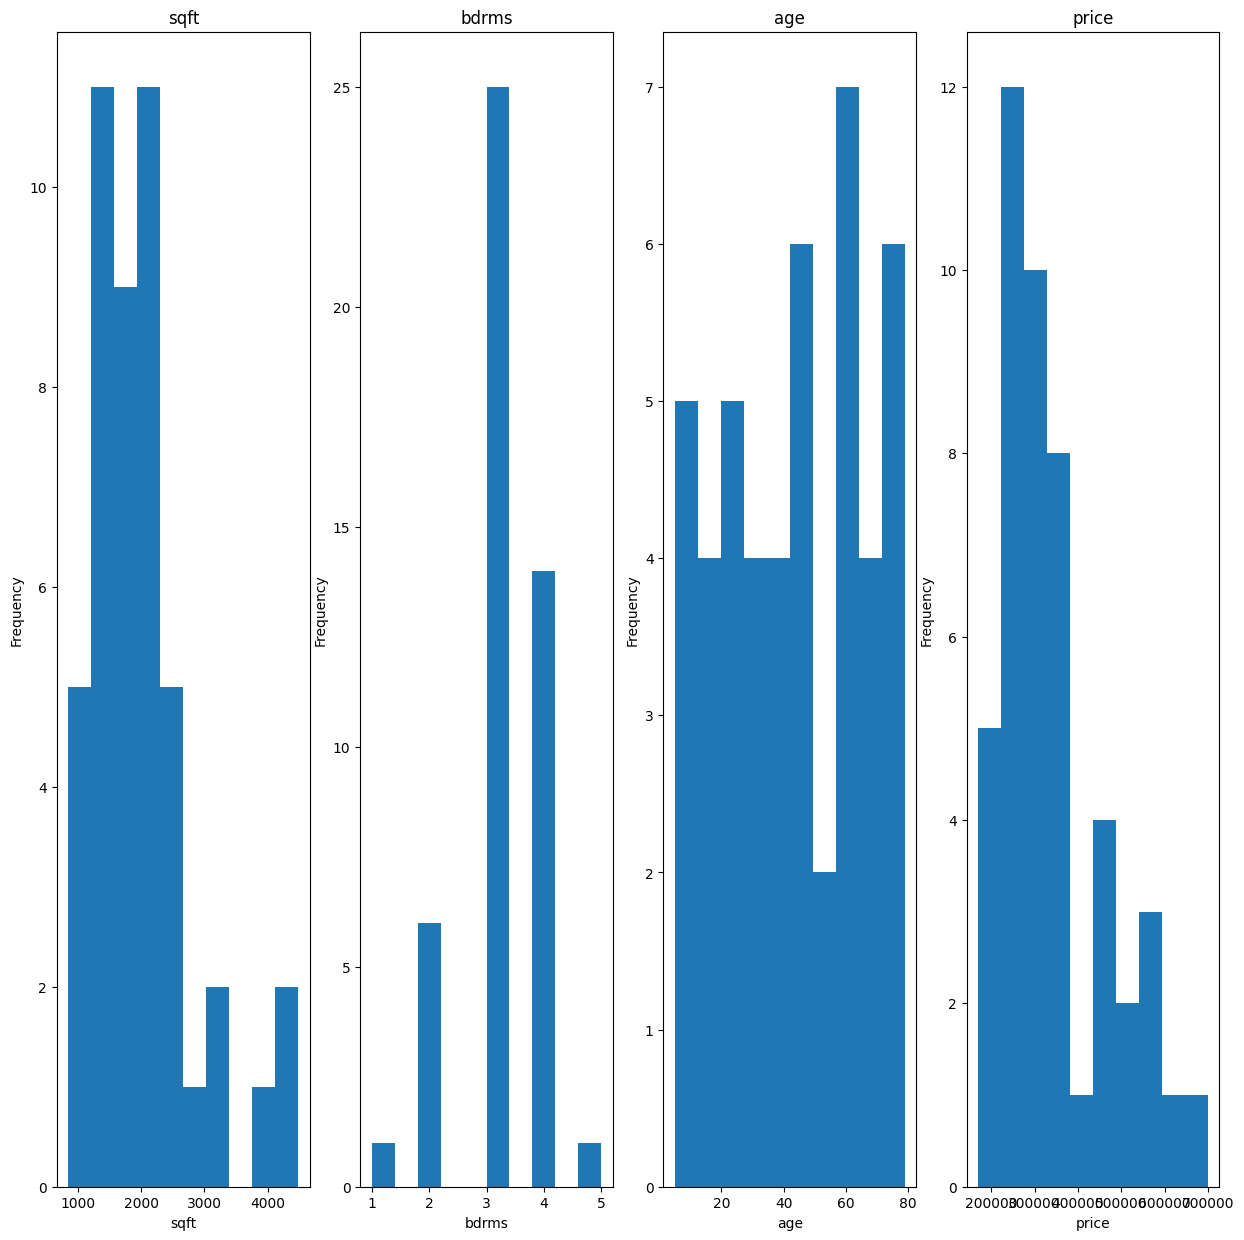

In [8]:
# plot the historgrams
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
for i, feature in enumerate(df.columns):
  plt.subplot(1,4,i+1)
  df[feature].plot(kind='hist', title=feature)
  plt.xlabel(feature)


In [9]:
#Create 2 variable x and Y

X = df[['sqft', 'bdrms', 'age']].values
Y = df['price'].values

In [10]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [12]:
Y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [18]:
# Create a linnear reg
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# split the data into train and test with the 20% test size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
# train the model on the training set and check it's accuracy on the training and test set
# how's your model doing? Is the loss growing smaller?
model.fit(X_train, Y_train, epochs=10) # don't have epochs just yet

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 133947637760.0000
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 131943145472.0000
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 128291725312.0000
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 122708443136.0000
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 124764454912.0000
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 115767009280.0000
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 116063158272.0000
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 111213805568.0000
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 115103023104.0000
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 109267730432.0000


In [25]:
df['price'].min()

169900

In [26]:
df['price'].max()

699900

In [23]:
len(X_train)

37

In [22]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [31]:
# try to improve your model with this experiments
#      - normalize the input features with one of the rescaling techniques
#      - use a different value for the learning rate of your model
#      - use a different optimizer

df['sqft1000'] = df['sqft']/1000
df['age10'] = df['age']/10
df['price100k'] = df['price']/100000

In [32]:
X = df[['sqft1000', 'bdrms', 'age10']].values
Y = df['price100k'].values

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 48.1137 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 37.1178
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25.7614
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.7652
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.2567 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.4316
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.1193
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6008
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.6553
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.6009


In [36]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.1), 'mean_squared_error')

In [37]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 28.3167
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 20.1333
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.5967
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.9355
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.1114 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.0653
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.6133
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.7154
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.1272
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.7167
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.9577
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.8609
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6740
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.2860
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.9233
Epoch 16/20
2/2 ━━━━━━━━━━━━━━

In [38]:
from sklearn.metrics import r2_score

In [39]:
# once you're satisfies write a prediction, check R2 score on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('R2 score on the training set:', r2_score(Y_train, y_train_pred))
print('R2 score on the test set:', r2_score(Y_test, y_test_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
R2 score on the training set: 0.0317479333052324
R2 score on the test set: 0.043306238192267754


Exercise 2
Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

Employee satisfaction level
Last evaluation
Number of projects
Average monthly hours
Time spent at the company
Whether they have had a work accident
Whether they have had a promotion in the last 5 years
Department
Salary
Whether the employee has left
Your goal is to predict the binary outcome variable left using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

load the dataset at ../data/HR_comma_sep.csv, inspect it with .head(), .info() and .describe().
Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using pd.concat.
do the usual train/test split with a 20% test size
play around with learning rate and optimizer
check the confusion matrix, precision and recall
check if you still get the same results if you use a 5-Fold cross validation on all the data
Is the model good enough for your boss?
As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under CC BY-SA 4.0 License.

In [60]:
# load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')

In [61]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [63]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [64]:
df.left.value_counts()/len(df)

,count
left,
0,0.761917
1,0.238083


<Axes: ylabel='Frequency'>

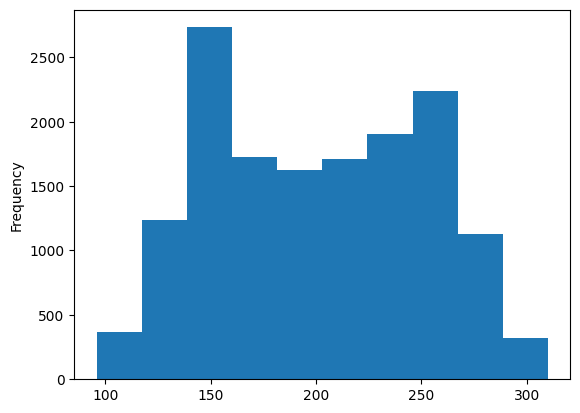

In [65]:
df['average_montly_hours'].plot(kind='hist')

In [66]:
df['average_monthly_hours_100']= df['average_montly_hours']/100

<Axes: ylabel='Frequency'>

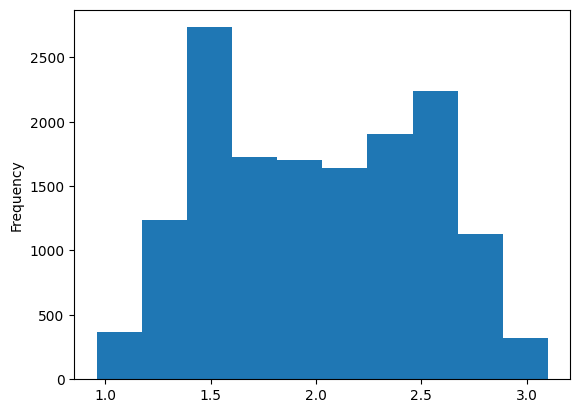

In [67]:
df['average_monthly_hours_100' ].plot(kind='hist')

In [68]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [69]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False


In [70]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary',
       'average_monthly_hours_100'],
      dtype='object')

In [86]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_monthly_hours_100']],
               df_dummies], axis=1)
# Convert all columns in X to numeric type


In [87]:
# Convert all columns in X to numeric type before train_test_split
for col in X.select_dtypes(include=['object']).columns:
    try:
        X[col] = pd.to_numeric(X[col], errors='raise')
    except ValueError:
        X = pd.get_dummies(X, columns=[col], drop_first=True, dtype=float)

In [88]:
X.shape

(14999, 20)

In [90]:
# do the usual train/test split with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X.values, df['left'].values, test_size=0.2)  # Use X.values here

In [91]:
# Ensure X_train and X_test have float dtype
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [92]:
# play around with learning rate and optimizer
# Define the model with Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [93]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7349 - loss: 0.7219
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7721 - loss: 0.5177
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7490 - loss: 0.5634
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7650 - loss: 0.5394
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7705 - loss: 0.5127
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7669 - loss: 0.5293
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7595 - loss: 0.5548
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7603 - loss: 0.5286
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7639 - loss: 0.5530
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7600 - loss: 0.5638


In [97]:

# Predict probabilities
y_test_pred_probs = model.predict(X_test)

# Get predicted classes
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [98]:
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [100]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,1203,1081
Leave,62,654


In [101]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68      2284
           1       0.38      0.91      0.53       716

    accuracy                           0.62      3000
   macro avg       0.66      0.72      0.61      3000
weighted avg       0.81      0.62      0.64      3000



In [104]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [105]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [106]:
from sklearn.model_selection import KFold, cross_val_score

In [108]:
!pip install scikeras==0.10.1 --force-reinstall

ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.7.0,<3.11.0; 0.2.0 Requires-Python >=3.6.7,<3.9; 0.2.1 Requires-Python >=3.6.7,<3.9; 0.6.0 Requires-Python >=3.7.0,<3.10.0; 0.6.1 Requires-Python >=3.7.0,<3.10.0; 0.7.0 Requires-Python >=3.7.0,<3.10.0; 0.8.0 Requires-Python >=3.7.0,<3.11.0; 0.9.0 Requires-Python >=3.7.0,<3.11.0
ERROR: Could not find a version that satisfies the requirement scikeras==0.10.1 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.3.0, 0.3.1, 0.3.3, 0.4.0, 0.4.1, 0.11.0, 0.12.0, 0.13.0)
ERROR: No matching distribution found for scikeras==0.10.1


In [113]:
import sklearn
print(sklearn.__version__)

1.6.1


In [114]:
pip install -U scikit-learn

In [117]:
print(type(model))

<class 'scikeras.wrappers.KerasClassifier'>


In [118]:
pip show scikeras

Name: scikeras
Version: 0.13.0
Summary: Scikit-Learn API wrapper for Keras.
Home-page: https://github.com/adriangb/scikeras
Author: Adrian Garcia Badaracco
Author-email: 1755071+adriangb@users.noreply.github.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: keras, scikit-learn
Required-by: 


In [119]:
pip install -U scikeras

In [121]:
scores

[]

In [123]:
# Is the model good enough for your boss?